# Linear Discriminant Analysis:

# The idea behind LDA is simple. Mathematically speaking, we need to find a new feature space to project the data in order to maximize classes separability. Well, obviously the first step is to find a way to measure this capacity of separation of each new feature space candidate. The distance between the projected means of each class could be one of the measures, however only this distance would not be a very good metric because it does not take the spread of data into account. I

## Thus, we come up with two measures: the within-class and the between-class. However, this formulation is only possible if we assume that the dataset has a Normal distribution. 

<img src="images/ldaintro.jpg" height=300 width=400>

# Linear Discriminant Analysis (LDA) can be used as a technique for feature extraction to increase the computational efficiency and reduce the degree of  over-fitting due to the curse of dimensionality in nonregularized models. 

# LDA vs PCA :

<img src="images/lda.png" height=350 width=300 >

## The general concept behind LDA is very similar to PCA:

### **-  Whereas PCA attempts to find the orthogonal component axes of maximum variance in a dataset; the goal in LDA is to find the feature subspace that optimizes class separability.**

### **-  Both LDA and PCA are linear transformation techniques that can be used to reduce the number of dimensions in a dataset; the former is an unsupervised algorithm, whereas the latter is supervised. **

## Thus, we might intuitively think that LDA is a superior feature extraction technique for classification tasks compared to PCA. However, A.M. Martinez reported that preprocessing via PCA tends to result in better classification results in an image recognition task in certain cases, for instance, if each class consists of only a small number of samples 

<img src="images/lda2.jpg" height=300 width=300>

Explaining from the figure below:

**A linear discriminant, as shown on the x-axis (LD 1), would separate the two normally distributed classes well.**

-  Although the exemplary linear discriminant shown on the y-axis (LD 2) captures a lot of the variance in the dataset, it  would fail as a good linear discriminant since it does not capture any of the  class-discriminatory information. One assumption in LDA is that the data is normally distributed. 

-  Also, we assume that the classes have identical covariance matrices and that the features are statistically independent of each other. However, even if one or more of those assumptions are slightly violated, LDA for dimensionality reduction can still work reasonably well

<img src="images/lda3.png">

## Steps for LDA:

# This section lists some suggestions you may consider when preparing your data for use with LDA.

-  **Classification Problems**. This might go without saying, but LDA is intended for classification problems where the output variable is categorical. LDA supports both binary and multi-class classification.
-  **Gaussian Distribution**. The standard implementation of the model assumes a Gaussian distribution of the input variables. Consider reviewing the univariate distributions of each attribute and using transforms to make them more Gaussian-looking (e.g. log and root for exponential distributions and Box-Cox for skewed distributions).
-  **Remove Outliers**. Consider removing outliers from your data. These can skew the basic statistics used to separate classes in LDA such the mean and the standard deviation.
-  **Same Variance**. LDA assumes that each input variable has the same variance. It is almost always a good idea to standardize your data before using LDA so that it has a mean of 0 and a standard deviation of 1.

_Below is an implementation on LDA on four featured IRIS Dataset_.

<img src="images/lda4.png">

# Code:

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
wine=pd.read_csv("dataset/wine.csv")

In [35]:
wine.shape

(178, 14)

In [36]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## As we see above, there are many features, which make the measure of Feature EXtraction necessary.

In [37]:
X=wine.iloc[:,0:13]
Y=wine.iloc[:,13]

In [38]:
X.shape     # Thus the features are included

(178, 13)

In [39]:
Y.shape     # Thus the responses are included

(178L,)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=.25)

In [41]:
X_train.shape

(133, 13)

In [42]:
Y_test.shape

(45L,)

## Since both LDA and PCA scale for the subset of data, we need to scale the data before applying the feature extraction technique. 

# The only difference between LDA and PCA is that while PCA has a dependant variable that is not taken as class, in LDA, this DV becomes classified as target. SO, LDA can be termed as a Supervised Extraction whereas PCA can be termed as Unsupervised Extraction.

In [43]:
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)

In [44]:
x_train.shape

(133L, 13L)

## Applying LDA

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)

In [46]:
x_train=lda.fit_transform(x_train,Y_train)
x_test=lda.transform(x_test)

In [47]:
x_test.shape

(45L, 2L)

In [48]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=1)
lr.fit(x_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [64]:
y_pred=lr.predict(x_test)
y_pred_train=lr.predict(x_train)

In [65]:
confusion_matrix(y_pred,Y_test)

array([[19,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 12]], dtype=int64)

### So, as we see, In the model, for Class 1 no entry was misclassified. In Class 2, only one entry was falsely classified, and lastly, for Class 3 , no misentry took place, Thus implying high accuracy.

In [66]:
confusion_matrix(y_pred_train,Y_train)

array([[40,  0,  0],
       [ 0, 58,  0],
       [ 0,  0, 35]], dtype=int64)

# As we see above, No entry of any Class was misclassified.

In [69]:
accuracy_score(Y_test,y_pred)

0.97777777777777775

In [70]:
accuracy_score(Y_train,y_pred_train)

1.0

# Lastly, we see the visualization of the data now.

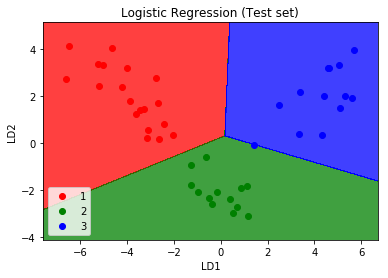

In [73]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Thus, this is how LDA takes place.